## 크롤링

~~어떤 사이트~~를 수집하느냐 보다는, 어떤 데이터를 수집 하느냐가 문제!

1. Robots.txt - 접근 제약 규칙 준수
2. Crawl delay - 사이트에 최대한 부담 지양
3. Term of use - 사이트 이용방침(약관) 준수
4. Public content - 지적재산권 침해 여부 주의
5. Authentication-based sites - 민간한 정보 수집 주의

## urllib
http 입장에서는 하위 레벨....

request 입장에서는 상위 레벨!

- urllib.request - Opening and reading URLs (전체주소)
- urllib.respose - Used internally by the urllib.request module ... 한번 가져오면 끝!
- urllib.parse - 파싱을 통해서 URL을 가져온다
- urllib.robotparser - Parsing robots.txt files를 통해서 가져올 수 있는지 없는지

:(colon)을 통해서 split을 시킨 다음에 가져올 수 있는지 없는 지 판단해도 되고 ㅇㅇ

In [1]:
from urllib import robotparser

In [2]:
robot = robotparser.RobotFileParser()

In [3]:
robot.set_url("https://news.naver.com//robots.txt")

In [4]:
robot.read()

In [5]:
robot.can_fetch("Yeti","/main/imagemontage") ##이 친구는 긁어가도 된다

True

Yeti에 한해서 허용해준다~ ... 내 bot의 이름을 Yeti라고 하면 된다.... ㅋㅋ...

In [6]:
robot.set_url("https://google.com//robots.txt")

In [7]:
robot.can_fetch("*","/search/about") ##잘 안먹힌다...

False

In [8]:
from urllib import request

In [9]:
resp = request.urlopen("http://www.google.com") 
##response 객체를 return할 것이다~

In [10]:
resp.geturl()
##Header에 있는 url을 가져온다.

'http://www.google.com'

In [11]:
resp.reason ## 받았을 경우 OK

'OK'

In [12]:
resp.getcode() ##200이면 받아온것!

200

In [13]:
print(resp.info())

Date: Fri, 12 Jul 2019 01:07:35 GMT
Expires: -1
Cache-Control: private, max-age=0
Content-Type: text/html; charset=ISO-8859-1
P3P: CP="This is not a P3P policy! See g.co/p3phelp for more info."
Server: gws
X-XSS-Protection: 0
X-Frame-Options: SAMEORIGIN
Set-Cookie: 1P_JAR=2019-07-12-01; expires=Sun, 11-Aug-2019 01:07:35 GMT; path=/; domain=.google.com
Set-Cookie: NID=187=aO1mwlsPs88rkbDA0DT0Qcgts5lbecbhxLK9gz3oyOwK3cgprOxCx9yMvmUs7bRcaaOq2tHx7zV9h2vUcPeg4x_HMuuX4R4ZVe8UFJoUjT4ksutZvKmGKQiIG1fLPThwQmn0lHir7o8uCsJ1-GUIzt37Gg9jJ1CfGDmZMaGsKSQ; expires=Sat, 11-Jan-2020 01:07:35 GMT; path=/; domain=.google.com; HttpOnly
Accept-Ranges: none
Vary: Accept-Encoding
Connection: close




In [14]:
resp.getheaders() ##상대방 서버에서 응답한 헤더
##헤더를 보게 되면, Cookie가 하나 생김... 나중에 Session과 같이 말할 것
##서버를 보면 gws

[('Date', 'Fri, 12 Jul 2019 01:07:35 GMT'),
 ('Expires', '-1'),
 ('Cache-Control', 'private, max-age=0'),
 ('Content-Type', 'text/html; charset=ISO-8859-1'),
 ('P3P', 'CP="This is not a P3P policy! See g.co/p3phelp for more info."'),
 ('Server', 'gws'),
 ('X-XSS-Protection', '0'),
 ('X-Frame-Options', 'SAMEORIGIN'),
 ('Set-Cookie',
  '1P_JAR=2019-07-12-01; expires=Sun, 11-Aug-2019 01:07:35 GMT; path=/; domain=.google.com'),
 ('Set-Cookie',
  'NID=187=aO1mwlsPs88rkbDA0DT0Qcgts5lbecbhxLK9gz3oyOwK3cgprOxCx9yMvmUs7bRcaaOq2tHx7zV9h2vUcPeg4x_HMuuX4R4ZVe8UFJoUjT4ksutZvKmGKQiIG1fLPThwQmn0lHir7o8uCsJ1-GUIzt37Gg9jJ1CfGDmZMaGsKSQ; expires=Sat, 11-Jan-2020 01:07:35 GMT; path=/; domain=.google.com; HttpOnly'),
 ('Accept-Ranges', 'none'),
 ('Vary', 'Accept-Encoding'),
 ('Connection', 'close')]

Schema가 http, https

host : www.google.com

? : 서비스

그리고 parameter가 나오는데, &붙은 것들 key 와 value 는 =로 구분!

In [15]:
https://www.google.com/search?
    source=hp&
    ei=fZsmXYmhCIbk8wWlk6UY&q=%EB%B0%195%EB%B3%B4%EC%98%81&
    oq=%EB%B0%95%EB%B3%B4%EC%98%81&
    gs_l=psy-ab.3..0l10.354717.355566..356472...1.0..1.127.962.6j6......0....1..gws-wiz.....0..0i131.ysQmbaFA4_0

IndentationError: unexpected indent (<ipython-input-15-1182cb946710>, line 2)

In [16]:
#resp = request.urlopen("https://www.google.com/search?source=hp&ei=fZsmXYmhCIbk8wWlk6UY&q=%EB%B0%95%EB%B3%B4%EC%98%81&o")
#resp.code, resp.reason
## 403Error 1. 요청을 잘못했을 때! 2. 접근권한이 없을 때!

HTTP Status Codes

2xx : Success ... here you go

4xx : Client error ... 내잘못 ... 서버가 터지면! you fucked up

5xx : Server error ... 서버 잘못 ... 터질랑 말랑 거리면! I funcked up

In [17]:
from urllib import error

In [18]:
try:
    resp = request.urlopen(
        "https://www.google.com/search?source=hp&ei=fZsmXYmhCIbk8wWlk6UY&q=%EB%B0%95%EB%B3%B4%EC%98%81&o"
                          )
except error.HTTPError as e:
    print(e.code, e.reason, e.headers)
##400대 에러이다~ 내 잘못이도다...
##500대이면 time sleep을 줘서 계속 다시 시도하게끔!

403 Forbidden Content-Type: text/html; charset=UTF-8
Date: Fri, 12 Jul 2019 01:07:59 GMT
Server: gws
Cache-Control: private
X-XSS-Protection: 0
X-Frame-Options: SAMEORIGIN
Alt-Svc: quic=":443"; ma=2592000; v="46,43,39"
Accept-Ranges: none
Vary: Accept-Encoding
Connection: close




결국 bot인 것을 숨겨야 한다!! 마치 내 컴퓨터에서 작업한 것처럼 해주어야한다~

**중요! Using user-agent!! ... 수집을 하는 데 있어 가장 기본이 되는 아이!!**

In [280]:
headers = {
    "user-agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"
}
param = {
    
}

In [20]:

try:
    req = request.Request(
        "https://www.google.com/search?source=hp&ei=fZsmXYmhCIbk8wWlk6UY&q=%EB%B0%95%EB%B3%B4%EC%98%81&o",
        headers=headers
                         )
    resp = request.urlopen(req)
except error.HTTPError as e:
    print(e.code, e.reason, e.headers)
##400대 에러이다~ 내 잘못이도다...
##500대이면 time sleep을 줘서 계속 다시 시도하게끔!
##urlopen() ca부터는 무시!

In [21]:
resp.code,resp.reason, req.headers 
##200에 OK니까 제대로 받아왔다~
##그리고 이제 header가 있다! 이 아이는 이제 봇이 아니고 사람이다... 막을 이유가 없다!

(200,
 'OK',
 {'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'})

### urlparse
- Break URL strings up in components
- combine the componenets back into a URL string
- Convert a relative URL to an absolute URL given a base URL

- quote_plus ... 띄어쓰기를 허용!
- unquote_plus ... 띄어쓰기 허용을 반대로!

In [22]:
#resp.read().decode('utf-8')
##html이 byte타입으로 넘어온 것을 볼 수 있다!
## utf-8을 해도, 한글 깨지는 것이 바뀌지 않음!

------------------------------------------------
urllib쓰는 것은 이제 잊어도 된다! 어떻게 써먹는지만~

## Requests!

- The Requests package is recommended for a higher-level HTTP client interface
- 결국 이 아이를 쓰는 것이 좋다~ 그리고 추천을 한다~
- get ... parameter
- post ... body
- put
- delete
- head
- options
- **response**

In [1]:
import requests ##이 아이는 한글이 있어도 그냥 가져온다~

In [24]:
url = "http://httpbin.org/get"
params= {"key":"value"}

In [25]:
resp = requests.request("get", url, params=params)

In [26]:
print(resp.text)

{
  "args": {
    "key": "value"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.13.0"
  }, 
  "origin": "163.152.3.139, 163.152.3.139", 
  "url": "https://httpbin.org/get?key=value"
}



In [27]:
url = "http://httpbin.org/post"

In [28]:
resp = requests.request("post", url, data=params)

In [29]:
print(resp.text)
##form에 파라메타가 들어가있음

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "key": "value"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "9", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.13.0"
  }, 
  "json": null, 
  "origin": "163.152.3.139, 163.152.3.139", 
  "url": "https://httpbin.org/post"
}



In [2]:
import requests
import time

def download(method ,url, param=None, data=None,timeout=1, maxetries=3): ##없을수도 있는 것에 None
    try : 
        resp = requests.request(method, url, params=param, data=data,
                       headers=headers)
        resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        if 500<= e.response.status_code <600 and maxetries>0:
            print(maxetries)
            time.sleep(timeout)
            print("재시도")
            download(method,url,param,data,timeout,maxetries-1)
        else :
            print(e.response.status_code)
            print(e.response.reason)
    return resp

##반복을 할때, 필요한게, 재시도를 할지, 얼만큼 기다릴지.

In [31]:
download("get",url,params)

405
METHOD NOT ALLOWED


<Response [405]>

In [32]:
url="https://www.google.com/search?source=hp&ei=fZsmXYmhCIbk8wWlk6UY&q=%EB%B0%95%EB%B3%B4%EC%98%81&o"

In [33]:
headers = None
download("get",url)

<Response [200]>

In [34]:
headers = {
    "user-agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"
}

In [35]:
url="https://www.google.com/search"

In [36]:
download("post",url)
##이거는 method적인 문제 405문제

405
Method Not Allowed


<Response [405]>

In [37]:
headers=None
html = download("get",
               "http://www.crawler-test.com/status_codes/status_403")

403
Forbidden


In [38]:
html = download("get",
               "http://www.crawler-test.com/status_codes/status_404")

404
Not Found


In [39]:
html = download("get",
               "http://www.crawler-test.com/status_codes/status_200")

In [40]:
html = download("get",
               "http://www.crawler-test.com/status_codes/status_500")

3
재시도
2
재시도
1
재시도
500
Internal Server Error


In [41]:
url = "http://httpbin.org/get"

In [42]:
html = download("get", url, param={"key":"value"})

In [3]:
import json
import urllib

In [44]:
json.loads(html.text)

{'args': {'key': 'value'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.13.0'},
 'origin': '163.152.3.139, 163.152.3.139',
 'url': 'https://httpbin.org/get?key=value'}

In [45]:
obj = json.loads(html.text)

In [46]:
obj.keys()

dict_keys(['url', 'headers', 'origin', 'args'])

In [47]:
params = {
    "serviceKey" : "xgnHIwrHEQw%2Bsurbf6sAoGLGAbUyTcXmWcdlkJ07HhGbNyp%2Bzifg1mCXWvJjOylHKsREA915rppfAqmfoA29TQ%3D%3D",
    "numOfRows":10,
    "pageNo":1,
    "sidoName":"서울",
    "dataTerm":"DAILY",
    "ver":1.3,
    "_returnType":"json"
 }

In [48]:
print(params,requests.compat.unquote(params["serviceKey"]))

{'serviceKey': 'xgnHIwrHEQw%2Bsurbf6sAoGLGAbUyTcXmWcdlkJ07HhGbNyp%2Bzifg1mCXWvJjOylHKsREA915rppfAqmfoA29TQ%3D%3D', 'pageNo': 1, 'ver': 1.3, 'sidoName': '서울', '_returnType': 'json', 'numOfRows': 10, 'dataTerm': 'DAILY'} xgnHIwrHEQw+surbf6sAoGLGAbUyTcXmWcdlkJ07HhGbNyp+zifg1mCXWvJjOylHKsREA915rppfAqmfoA29TQ==


In [49]:
params["serviceKey"] = requests.compat.unquote(params["serviceKey"]) 
#params["serviceKey"] = urllib.parse.unquote(params["serviceKey"]) 
#params = urllib.parse.urlencode(params)
##quote로 byte타입을 날리는데, 에러가 떳다는 것
## 이 친구가 byte인지 모르고 str로 날려줘서 그런 것!

In [50]:
url = "http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getCtprvnRltmMesureDnsty"

In [51]:
html = download("get",url,param=params)
html.url

'http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getCtprvnRltmMesureDnsty?serviceKey=xgnHIwrHEQw%2Bsurbf6sAoGLGAbUyTcXmWcdlkJ07HhGbNyp%2Bzifg1mCXWvJjOylHKsREA915rppfAqmfoA29TQ%3D%3D&pageNo=1&ver=1.3&sidoName=%EC%84%9C%EC%9A%B8&_returnType=json&numOfRows=10&dataTerm=DAILY'

In [52]:
print(html.text)

{"list":[{"_returnType":"json","coGrade":"1","coValue":"0.4","dataTerm":"","dataTime":"2019-07-12 09:00","khaiGrade":"2","khaiValue":"53","mangName":"도시대기","no2Grade":"2","no2Value":"0.032","numOfRows":"10","o3Grade":"1","o3Value":"0.008","pageNo":"1","pm10Grade":"1","pm10Grade1h":"1","pm10Value":"9","pm10Value24":"7","pm25Grade":"1","pm25Grade1h":"1","pm25Value":"6","pm25Value24":"4","resultCode":"","resultMsg":"","rnum":0,"serviceKey":"","sidoName":"","so2Grade":"1","so2Value":"0.003","stationCode":"","stationName":"중구","totalCount":"","ver":""},{"_returnType":"json","coGrade":"1","coValue":"0.5","dataTerm":"","dataTime":"2019-07-12 09:00","khaiGrade":"2","khaiValue":"61","mangName":"도로변대기","no2Grade":"2","no2Value":"0.037","numOfRows":"10","o3Grade":"1","o3Value":"0.006","pageNo":"1","pm10Grade":"1","pm10Grade1h":"2","pm10Value":"33","pm10Value24":"16","pm25Grade":"1","pm25Grade1h":"1","pm25Value":"14","pm25Value24":"9","resultCode":"","resultMsg":"","rnum":0,"serviceKey":"","sidoNa

In [53]:
obj = json.loads(html.text)

In [54]:
print(obj)

{'parm': {'pm25Value24': '', 'dataTime': '', 'coGrade': '', 'pm25Grade': '', 'sidoName': '서울', 'numOfRows': '10', 'stationName': '', '_returnType': 'json', 'pm10Value': '', 'khaiValue': '', 'rnum': 0, 'coValue': '', 'khaiGrade': '', 'resultCode': '', 'pm25Value': '', 'resultMsg': '', 'stationCode': '', 'no2Grade': '', 'mangName': '', 'pm25Grade1h': '', 'pm10Grade1h': '', 'o3Grade': '', 'serviceKey': 'xgnHIwrHEQw+surbf6sAoGLGAbUyTcXmWcdlkJ07HhGbNyp+zifg1mCXWvJjOylHKsREA915rppfAqmfoA29TQ==', 'dataTerm': 'DAILY', 'pm10Grade': '', 'so2Value': '', 'pageNo': '1', 'no2Value': '', 'so2Grade': '', 'totalCount': '', 'ver': '1.3', 'pm10Value24': '', 'o3Value': ''}, 'ArpltnInforInqireSvcVo': {'pm25Value24': '', 'dataTime': '', 'coGrade': '', 'pm25Grade': '', 'sidoName': '서울', 'numOfRows': '10', 'stationName': '', '_returnType': 'json', 'pm10Value': '', 'khaiValue': '', 'rnum': 0, 'coValue': '', 'khaiGrade': '', 'resultCode': '', 'pm25Value': '', 'resultMsg': '', 'stationCode': '', 'no2Grade': '', 

In [55]:
resp = requests.request('get', url, params=params)

In [56]:
obj = json.loads(html.text)

In [57]:
obj

{'ArpltnInforInqireSvcVo': {'_returnType': 'json',
  'coGrade': '',
  'coValue': '',
  'dataTerm': 'DAILY',
  'dataTime': '',
  'khaiGrade': '',
  'khaiValue': '',
  'mangName': '',
  'no2Grade': '',
  'no2Value': '',
  'numOfRows': '10',
  'o3Grade': '',
  'o3Value': '',
  'pageNo': '1',
  'pm10Grade': '',
  'pm10Grade1h': '',
  'pm10Value': '',
  'pm10Value24': '',
  'pm25Grade': '',
  'pm25Grade1h': '',
  'pm25Value': '',
  'pm25Value24': '',
  'resultCode': '',
  'resultMsg': '',
  'rnum': 0,
  'serviceKey': 'xgnHIwrHEQw+surbf6sAoGLGAbUyTcXmWcdlkJ07HhGbNyp+zifg1mCXWvJjOylHKsREA915rppfAqmfoA29TQ==',
  'sidoName': '서울',
  'so2Grade': '',
  'so2Value': '',
  'stationCode': '',
  'stationName': '',
  'totalCount': '',
  'ver': '1.3'},
 'list': [{'_returnType': 'json',
   'coGrade': '1',
   'coValue': '0.4',
   'dataTerm': '',
   'dataTime': '2019-07-12 09:00',
   'khaiGrade': '2',
   'khaiValue': '53',
   'mangName': '도시대기',
   'no2Grade': '2',
   'no2Value': '0.032',
   'numOfRows': '

In [4]:
from html import unescape,escape

In [59]:
url = "https://search.naver.com/search.naver"
params= {"query":"아이린"}

In [60]:
html = download("get",url,param=params)

예제) 교보문고

여기는 검색이 POST방식!

form에 파라메타가 들어가있음

그런데 인코딩이 'euc-kr' 이고 자바스크립트로 들어가 보면

In [61]:
url = "http://www.kyobobook.co.kr/search/SearchCommonMain.jsp"
params= {"vPstrCategory":"TOT",
         "vPstrKeyWord":"adsp",
         "vPplace" : "top",
         }

In [62]:
html = download("post",url,data=params)

In [63]:
html = unescape(html)

In [64]:
html.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<!-- header -->\n \n\n\n\n\n\n\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\n\n\n<head>\n\t<title>adsp -  인터넷교보문고</title>\n<META http-equiv="Pragma" content="nocache">\n<meta http-equiv="Expires" content="0"/>\n<META http-equiv="Cache-Control" content="no-cache">\n<META http-equiv=\'Content-Type\' content=\'text/html; charset=euc-kr\'>\n<meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1">\n<!--<LINK href="/common/Style.css" rel="stylesheet" type="text/css"/>-->\n<link rel="shortcut icon" href="/newimages/apps/b2c/kyobo.ICO"/>\n<link rel="stylesheet" type="text/css" href="http://image.kyobobook.co.kr/ink/css/default_ink.css" />\n<link rel="stylesheet" type="text/css" href="http://image.kyobobook.co.kr/ink/css/search.css" />\n<!--\n<link rel="styleshee

In [65]:
with open("교보문고.html", "w") as f:
    f.write(html.text)

In [66]:
url = "http://www.kyobobook.co.kr/search/SearchCommonMain.jsp"
params= {"vPstrCategory":"TOT",
         "vPstrKeyWord":"박보영",
         "vPplace" : "top",
         }

In [67]:
escape(requests.compat.quote("박보영",safe=""))

'%EB%B0%95%EB%B3%B4%EC%98%81'

In [68]:
html = download("post",url,data=params)

In [69]:
html.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<!-- header -->\n \n\n\n\n\n\n\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\n\n\n<head>\n\t<title>諛?蹂댁?? -  인터넷교보문고</title>\n<META http-equiv="Pragma" content="nocache">\n<meta http-equiv="Expires" content="0"/>\n<META http-equiv="Cache-Control" content="no-cache">\n<META http-equiv=\'Content-Type\' content=\'text/html; charset=euc-kr\'>\n<meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1">\n<!--<LINK href="/common/Style.css" rel="stylesheet" type="text/css"/>-->\n<link rel="shortcut icon" href="/newimages/apps/b2c/kyobo.ICO"/>\n<link rel="stylesheet" type="text/css" href="http://image.kyobobook.co.kr/ink/css/default_ink.css" />\n<link rel="stylesheet" type="text/css" href="http://image.kyobobook.co.kr/ink/css/search.css" />\n<!--\n<link rel="stylesh

In [70]:
with open("교보문고_박보영.html", "w") as f:
    f.write(html.text)

In [ ]:
url = "http://www.ppomppu.co.kr/search_bbs.php"
params = {
    "keyword" : "아이린"
}

In [ ]:
html = download("get",url,param=params)

In [ ]:
html.text

### Session, Cookie

어떤 이벤트를 발생시켜서 값을 넘길 때에는 form을 사용해야한다!!

궁금하면, 네이버에서 로그인할 때에 form태그가 어디에 있는지 확인을 해봐야 한다~

urljoin은 urllib에도 있고 requests에도 있다

In [6]:
requests.compat.urlparse("http://pythonscraping.com/pages/cookies/login.html")

ParseResult(scheme='http', netloc='pythonscraping.com', path='/pages/cookies/login.html', params='', query='', fragment='')

In [7]:
requests.compat.urlparse("http://pythonscraping.com/pages/cookies/login.html?id=1234")

ParseResult(scheme='http', netloc='pythonscraping.com', path='/pages/cookies/login.html', params='', query='id=1234', fragment='')

In [8]:
requests.compat.urljoin("http://pythonscraping.com/pages/cookies/login.html?id=1234",
                       "process.php")

'http://pythonscraping.com/pages/cookies/process.php'

In [9]:
url = "http://pythonscraping.com/pages/cookies/login.html"
url = requests.compat.urljoin(url,"welcome.php")
data = {
    "username":"1234",
    "password":"password"
}

In [12]:
html = download("post",url,data=data)

In [13]:
print(html.text)


<h2>Welcome to the Website!</h2>
Whoops! You logged in wrong. Try again with any username, and the password "password"<br><a href="login.html">Log in here</a>


로그인이 되지 않은 상태!! why??

쿠키나 세션 값을 가져오지 않은 상태이다~ 그래서 로그인이 되지 않는다!

In [14]:
session = requests.Session() ##세션이나 쿠키를 생성해주는 아이~

In [15]:
session.cookies

<RequestsCookieJar[]>

In [16]:
html = session.post(url,data)
##세션 또한 리퀘스트패키지 안에 있다 그래서 get이나 post가 있다
##이 아이를 통해서 접근하면 Session이나 Cookie가 있다~
print(html.text)


<h2>Welcome to the Website!</h2>
Whoops! You logged in wrong. Try again with any username, and the password "password"<br><a href="login.html">Log in here</a>


처음할 때에는 세션으로 등록을 먼저 하고, 등록을 한 상태에서 들어가면,

세션이 등록된 상태!!... 여기서 쿠키를 찍으면 값이 있긴 하다

한번 더 실행을 시키면 로그인이 되는 것이다~

In [17]:
session.cookies

<RequestsCookieJar[Cookie(version=0, name='loggedin', value='1', port=None, port_specified=False, domain='pythonscraping.com', domain_specified=False, domain_initial_dot=False, path='/pages/cookies', path_specified=False, secure=False, expires=None, discard=True, comment=None, comment_url=None, rest={}, rfc2109=False), Cookie(version=0, name='username', value='1234', port=None, port_specified=False, domain='pythonscraping.com', domain_specified=False, domain_initial_dot=False, path='/pages/cookies', path_specified=False, secure=False, expires=None, discard=True, comment=None, comment_url=None, rest={}, rfc2109=False)]>

In [18]:
html = session.post(url)
##세션 또한 리퀘스트패키지 안에 있다 그래서 get이나 post가 있다
##이 아이를 통해서 접근하면 Session이나 Cookie가 있다~
print(html.text)


<h2>Welcome to the Website!</h2>
You have logged in successfully! <br><a href="profile.php">Check out your profile!</a>


이렇게 로그인을 해준다!! 그렇다면 더 많은 데이터를 긁어올 수 있다!!

이거를 이용해서 댓글 조작 및 좋아요 조작이 가능하다~

In [19]:
session = requests.Session() ##세션이나 쿠키를 생성해주는 아이~

In [20]:
url = "https://knu.everytime.kr/login"
data = {
    "userid":"pje49990",
    "password":"tlqdlqjs12"
}

In [21]:
html = session.post(url,data)
##세션 또한 리퀘스트패키지 안에 있다 그래서 get이나 post가 있다
##이 아이를 통해서 접근하면 Session이나 Cookie가 있다~
print(html.text)

<!DOCTYPE html>
<html lang="ko">
<head>
  <title>경북대 에브리타임</title>
  <meta charset="utf-8">
  <meta name="referrer" content="origin">
  <meta http-equiv="X-UA-Compatible" content="IE=edge">
  <meta property="fb:app_id" content="258676027581965">
  <meta property="og:type" content="website">
  <meta property="og:image" content="https://everytime.kr/images/og_image.png">
  <meta property="og:url" content="https://knu.everytime.kr/login">
  <meta property="og:site_name" content="경북대 에브리타임">
  <meta property="og:title" content="경북대 에브리타임">
  <meta property="og:description" content="경북대 재학생 커뮤니티. 시간표 작성, 강의평가, 자유게시판, 비밀게시판 등 제공.">
  <meta name="description" content="경북대 재학생 커뮤니티. 시간표 작성, 강의평가, 자유게시판, 비밀게시판 등 제공.">
  <meta name="keywords" content="에브리타임, 에타, everytime, 시간표, 수강신청, 강의평가, 학점계산기, 학식, 오늘의학식, 책방, 중고책, 대학생, 대학교, 대학, 대학생 시간표, 대학교 시간표, 대학생 커뮤니티, 대학교 커뮤니티, 시간표 앱, 시간표 어플">
  <meta name="naver-site-verification" content="7366738375e320e44bd1c743b364db13086a7b0e">
  <meta name="robots" c

In [22]:
session.cookies

<RequestsCookieJar[]>

In [23]:
html = session.post(url)
##세션 또한 리퀘스트패키지 안에 있다 그래서 get이나 post가 있다
##이 아이를 통해서 접근하면 Session이나 Cookie가 있다~
##에타 ㅇㅇ

In [24]:
url = 'https://lms.sunde41.net'
url = requests.compat.urljoin(url,"auth/login")
data = {
    "email":"pji49990@naver.com",
    "password":"1996-01-18"
}

In [25]:
session = requests.Session() ##세션이나 쿠키를 생성해주는 아이~

In [26]:
html = session.post(url,data)
##세션 또한 리퀘스트패키지 안에 있다 그래서 get이나 post가 있다
##이 아이를 통해서 접근하면 Session이나 Cookie가 있다~

In [27]:
session.cookies

<RequestsCookieJar[Cookie(version=0, name='session', value='.eJwljjsOw0AIBe9C7QIC-8GXsZYFlLR2XEW5e1ZK-2Y0eh848ozrCfv7vGOD4-WwA3tRGdhzCtZeama6rRFb0TbENDEGVXIlsxhoTDaRe6rwmOXR2K2FOJGzOHNtkq4th_sKUoawT5x9NWwunMtXq0m4fMwKG9xXnP8zAt8fykwvuw.XT3qnA.9IO-TrFntHRMzuFinog7EECN1BI', port=None, port_specified=False, domain='.lms.sunde41.net', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=False, expires=None, discard=True, comment=None, comment_url=None, rest={'HttpOnly': None}, rfc2109=False)]>

지금부터 bs4이 정말 쓰기 편하구나~ 라는 걸 깨닭을 것이다!

In [11]:
headers = {
    "user-agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"
}

In [28]:
url = "https://www.google.com/search"
params = {"q" : "박보영"}

In [29]:
html = download("get",url,param=params)

In [30]:
import re

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><meta content="origin" name="referrer"><title>박보영 - Google 검색</title><script nonce="eJ5MLT8T93rGiIAu8NByjQ==">(function(){window.google={kEI:\'quo9XcOfDa2Or7wP3u65yA4\',kEXPI:\'31\',authuser:0,kscs:\'c9c918f0_quo9XcOfDa2Or7wP3u65yA4\',kGL:\'KR\'};google.sn=\'web\';google.kHL=\'ko\';google.jsfs=\'\';})();(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||google.kEI};google.getLEI=function(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b};google.https=function(){return"https:"==window.location.protocol};google.ml=function(){return null};google.time=function(){return(new Date).getTime()};google.log=function(a,b,e,c,g){if(a=google.logUrl(a,b,e,c,g)){b=new Image;va
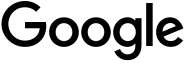
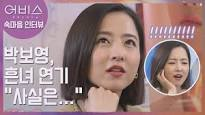
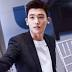

In [31]:
unescape(html.text)

In [32]:
pattern1 = r'''\B<div class=.+?>+<a href="(.+?)".+?>\B'''

In [294]:
pattern1 = r'''<div\sclass="r"><a\shref="(.+?)">'''

In [37]:
pattern2 = r'''<h3.+?>(.+?)<\/h3>'''

\B<div class="r"><a href="(.+?)" .?>\B<h3 .+?>(.+?)</h3>

In [33]:
result1 = re.findall(pattern1,unescape(html.text))

In [35]:
result1

['https://www.google.com/webhp?hl=ko&sa=X&ved=0ahUKEwjDnM-voNjjAhUtx4sBHV53DukQPAgH',
 '/preferences?hl=ko&prev=https://www.google.com/search?q%3D%25EB%25B0%2595%25EB%25B3%25B4%25EC%2598%2581',
 'https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81',
 'https://www.youtube.com/watch?v=M6w1XcxejBg',
 'https://www.youtube.com/watch?v=SAC2EHpNbvg',
 'https://www.youtube.com/watch?v=imFsqjT20n0',
 'https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81',
 'https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81%EC%9D%98_%EC%9E%91%ED%92%88_%EB%AA%A9%EB%A1%9D',
 'https://news.joins.com/article/22895953',
 'https://twitter.com/hashtag/%EB%B0%95%EB%B3%B4%EC%98%81',
 'https://movie.daum.net/person/main?personId=105244',
 'https://www.msn.com/ko-kr/entertainment/news/%EB%B0%95%EB%B3%B4%EC%98%81-tvn-%EB%93%9C%EB%9D%BC%EB%A7%88-%EC%96%B4%EB%B9%84%EC%8A%A4-%EC%97%AC%EC%A3%BC%EC%9D%B8%EA%B3%B5/ar-BBLZzVh',
 '/search?q=%EB%B0%95%EB%B3%B4%EC%98%81+%EB%82%98%EC%9D%B4&sa=X&ved=2ahUKEwjDnM-voNjjAhUtx4sBHV

In [34]:
len(result1)

28

In [40]:
result2 = re.findall(pattern2,unescape(html.text))

In [41]:
len(result2)

10

In [42]:
result2

['박보영 - 나무위키',
 '동영상',
 '박보영 - 위키백과, 우리 모두의 백과사전',
 '박보영의 작품 목록 - 위키백과, 우리 모두의 백과사전',
 '박보영은 오래 지켜본다. 연애도, 연기 변신도 - 중앙일보',
 '#박보영 hashtag on Twitter',
 '박보영 - Daum 영화',
 "박보영, tvN 드라마 '어비스' 여주인공 - MSN.com",
 '관련 검색: 박보영',
 '설명']

여기서부터 네이버 뉴스 링크 - 타이틀 가져오기!

In [43]:
result = [tag for tag in result if 'href' in tag]

NameError: name 'result' is not defined

In [164]:
len(result)

0

In [ ]:
pattern = r'href="(.*)"'

In [ ]:
url = 'https://www.google.com'

In [ ]:
result = [re.search(pattern, tag).group(1) for tag in result]

In [ ]:
result

In [ ]:
for link in result:
    if 'namu.wiki' in link:
        print(re.sub('%25', '%', re.search(r'url[?]q=(.*)(&amp;.*)(&amp;.*)(&amp;.*)', link).group(1)))

<div class="r">